# Title

* The title of your project goes here

## Imports

In [1]:
#import data tools
import numpy as np
import pandas as pd
# import data acquisition functions
import wrangle as w
# import exploration visualizations
import explore as e
# import ML models
import modeling as m
# import statistic tools
from scipy import stats

## Acquire

* The data was acquired from Data.World [https://data.world/food/wine-quality]
* The data was downloaded as csv files and combined into one csv locally
* The orginal size of the dataset was 6497 rows by 13 columns
* Each row represents one variant of the Portuguese "Vinho Verde" wine
* Each column represents one aspect of the chemical test of the wine

In [2]:
# Import acquired messy data from your acquire file here
df = w.acquire_data()

## Prepare

* The original csv files were combined into one dataset
* A new column was created to indicate if the wine was red or white, this new variable was then converted into a dummy variable
* We found a few outliers, but after doing some domain research, we found that the outliers were within the standard acceptable range for their tests
* We removed spaces from column names
* The dataset was split into train, validate and test groups (56%, 24%, 20%)
* Data was scaled using a MinMaxScaler in preparation for clustering

In [3]:
# Import your prepare function and use it to clean your data here
train, validate, test = w.wrangle()

## Explore

* Here you will explore your data then highlight 4 questions that you asked of the data and how those questions influenced your analysis
* Remember to split your data before exploring how different variables relate to one another
* Each question should be stated directly 
* Each question should be supported by a visualization
* Each question should be answered in natural language
* Two questions must be supported by a statistical test, but you may choose to support more than two
* See the following example, and read the comments in the next cell

### 1) Question about the data
* Ask a question about the data for which you got a meaningful result
* There is no connection can be a meaningful result

### 2) Visualization of the data answering the question

* Visualizations should be accompanied by take-aways telling the reader exactly what you want them to get from the chart
* You can include theses as bullet points under the chart
* Use your chart title to provide the main take-away from each visualization
* Each visualization should answer one, and only one, of the explore questions

### 3) Statistical test
* Be sure you are using the correct statistical test for the type of variables you are testing
* Be sure that you are not violating any of the assumptions for the statistical test you are choosing
* Your notebook should run and produce the results of the test you are using (This may be done through imports)
* Include an introduction to the kind of test you are doing
* Include the Ho and Ha for the test
* Include the alpha you are using
* Include the readout of the p-value for the test
* Interpret the results of the test in natural language (I reject the null hypothesis is not sufficient)

### 4) Answer to the question
* Answer the question you posed of the data by referring to the chart and statistical test (if you used one)
* If the question relates to drivers, explain why the feature in question would/wouldn't make a good driver

**The following empty code block** is here to represent the countless questions, visualizations, and statistical tests 
that did not make your final report. Data scientist often create a myriad of questions, visualizations 
and statistical tests that do not make it into the final notebook. This is okay and expected. Remember 
that shotgun approaches to your data such as using pair plots to look at the relationships of each feature 
are a great way to explore your data, but they have no place in your final report. 
**Your final report is about showing and supporting your findings, not showing the work you did to get there!**

## Question - Does alcohol content increase quality?

<Figure size 1600x1200 with 0 Axes>

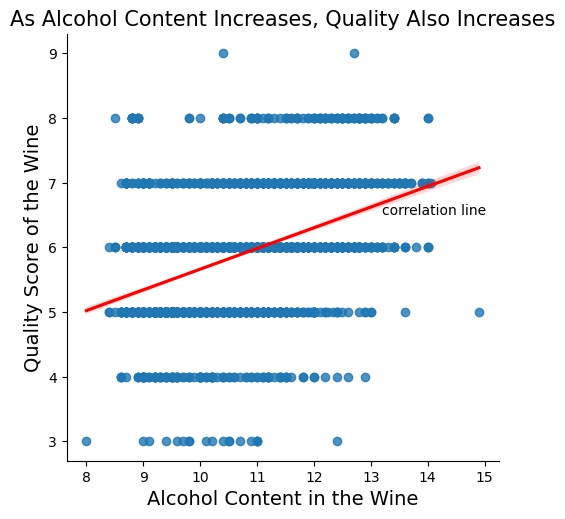

In [4]:
e.get_plot_alcohol_by_quantity(train)

#### Is there a statistial correlation?
- alcohol is a continuous variable with right skew
- quality appears to be a ordinal variable, non parametric 
- we are looking to do a spearman test
- H$_0$ : There is no correlation
- H$_a$ : There is a linear correlation between quality and volatile acidity
- α = 0.05

In [5]:
e.check_hypothesis(train, 'quality', 'alcohol', test=stats.spearmanr)

Since the p-value is less than 0.05, 
we can reject the null hypothesis and conclude that quality and alcohol are correlated.
The correlation coefficient between quality and alcohol is 0.44 with a p-value of 0.0000
_______________________________________________________


### We are able to conclude that there is a linear correlation between quality and density, with a correlation coefficient of 0.44 (as alcohol goes up, quality goes up)

## Question - Does density have an effect on quality?

<Figure size 1600x1200 with 0 Axes>

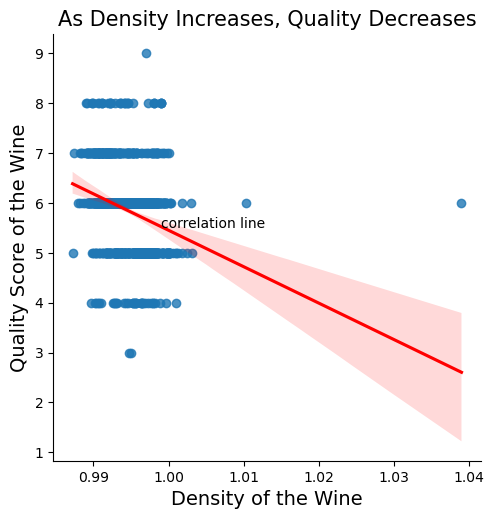

In [6]:
e.get_plot_density_by_quantity(train)

In [13]:
e.check_hypothesis(train, 'quality', 'density', test=stats.spearmanr)

Since the p-value is less than 0.05, 
we can reject the null hypothesis and conclude that quality and density are correlated.
The correlation coefficient between quality and density is -0.32 with a p-value of 0.0000
_______________________________________________________


### We are able to conclude that there is a linear correlation between quality and density, with a correlation coefficient of -0.32 (as density goes up, quality goes down)

## Exploration Summary
* After your explore section, before you start modeling, provide a summary of your findings in Explore
* Include a summary of your take-aways
* Include a summary of the features you examined and weather or not you will be going to Modeling with each feature and why
* It is important to note which features will be going into your model so the reader knows what features you are using to model on

## Modeling

In [8]:
# split train, validate and test into X and y variable groups
X_train, y_train, X_validate, y_validate, X_test, y_test = \
e.get_x_y_train_val_test(train,validate,test)

# convert the y-variable lists into dataFrames
y_train = pd.DataFrame(y_train)
y_validate = pd.DataFrame(y_validate)
y_test = pd.DataFrame(y_test)

### Introduction
* Since we are approaching this as a regression problem we will be looking at the metrics:
* Root Mean Squared Error (RMSE): which gives the total error in the predictions from the observed quality scores
* R$^2$: which is the proportion of variance from the mean value that is explainable by our model

### Baseline Model
- calculated by geting the mean of quality scores from the training dataset

In [9]:
# retrieve metrics for our baseline model
m.get_baseline_model(y_train)

Baseline Model (mean)
RMSE for baseline model: 0.86627299
R^2 for baseline model: 0.0


### Best 3 Models
* Show the three best model results obtained using your selected features to predict the target variable
* Typically students will show the top models they are able to generate for three different model types

In [15]:
f_features_kbest = ['volatile_acidity', 'chlorides', 'density', 'alcohol']

## You may use this as a template for how to introduce your models:

### Model Type

### Polynomial Regressor - kbest features

In [16]:
# retrieve a polynomial model and metrics using the kbest feature set
lm2, X_train_degree2, X_validate_degree2, X_test_degree2 = \
    m.get_model_polynomial(X_train, X_validate, X_test,
                         y_train, y_validate, y_test,
                         f_features_kbest)

model : Polynomial-kbest
RMSE_train: 0.7373
RMSE_validate: 0.7526
difference: 0.01535
R2: 0.2841


### Test Model
* Choose the best model out of the three as you best model and explain why you have chosen it
* Explain that you will now run your final model on test data to gauge how it will perform on unseen data

In [17]:
# make predictions using the test data and print results
y_test = m.get_polynomial_test(lm2, X_test_degree2, y_test)

Polynomial Model on Test Data
RMSE on test data: 0.74790113
R^2 value: 0.266


### Modeling Wrap 
* Give a final interpretation of how the models test score compares to the baseline and weather you would recommend this model for production

## Conclusion

### Summery
* Summarize your findings and answer the questions you brought up in explore 
* Summarize how drivers discovered lead or did not lead to a successful model 

### Recommendations
* Recommendations are actions the stakeholder should take based on your insights

### Next Steps
* Next Steps are what you, as a Data Scientist, would do if provided more time to work on the project

**Where there is code in your report there should also be code comments telling the reader what each code block is doing. This is true for any and all code blocks even if you are using a function to import code from a module.**
<br>
<br>
**Your Notebook should contain adequate markdown that documents your thought process, decision making, and navigation through the pipeline. As a Data Scientist, your job does not end with making data discoveries. It includes effectively communicating those discoveries as well. This means documentation is a critical part of your job.**

# README

Your README should contain all of the following elements:

* **Title** Gives the name of your project
* **Project Description** Describes what your project is and why it is important 
* **Project Goal** Clearly states what your project sets out to do and how the information gained can be applied to the real world
* **Initial Hypotheses** Initial questions used to focus your project 
* **Project Plan** Guides the reader through the different stages of the pipeline as they relate to your project
* **Data Dictionary** Gives a definition for each of the features used in your report and the units they are measured in, if applicable
* **Steps to Reproduce** Gives instructions for reproducing your work. i.e. Running your notebook on someone else's computer.